<h1>Data Mining Project 2</h1><br>
<h2>Exploration on Crime Data</h2><br>


<b>1) Importing</b> the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import folium

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.cluster import KMeans

from folium.plugins import MarkerCluster

<b>2) Loading crime dataset </b>with pandas<br>
[Below there is a preview of how the dataframe is structured]

In [3]:
df=pd.read_csv('crime.csv',engine='python')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


<h3>Question 1</h3><br>
Using <b>months</b> and <b>days</b> lists as sorters to have our visualizations in a representative format.

In [4]:
#Question 1
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

crime_year = {2015: 0, 2016: 0, 2017: 0, 2018: 0}
crime_month = {}
crime_day = {}
crime_district = {}

#initialize months
for month in months:
    crime_month[month] = 0
for day in days:
    crime_day[day] = 0

for year, month_id, day, district in zip(df['YEAR'], df['MONTH'], df['DAY_OF_WEEK'], df['DISTRICT']):

    crime_year[year] += 1
    
    crime_month[months[month_id-1]] += 1
        
    crime_day[day] += 1
        
    if district in crime_district:
        crime_district[district] += 1
    else:
        crime_district[district] = 1

<b>Converting dictionaries to pandas dataframes</b> in order to be plotted with seaborn library

In [5]:
monthly_df = pd.DataFrame(list(crime_month.items()), columns=['Month', 'Crimes'])

yearly_df = pd.DataFrame(list(crime_year.items()), columns=['Year', 'Crimes'])

daily_df = pd.DataFrame(list(crime_day.items()), columns=['Day', 'Crimes'])

district_df = pd.DataFrame(list(crime_district.items()), columns=['District', 'Crimes'])

LinePlot of crime activity per month, with seaborn

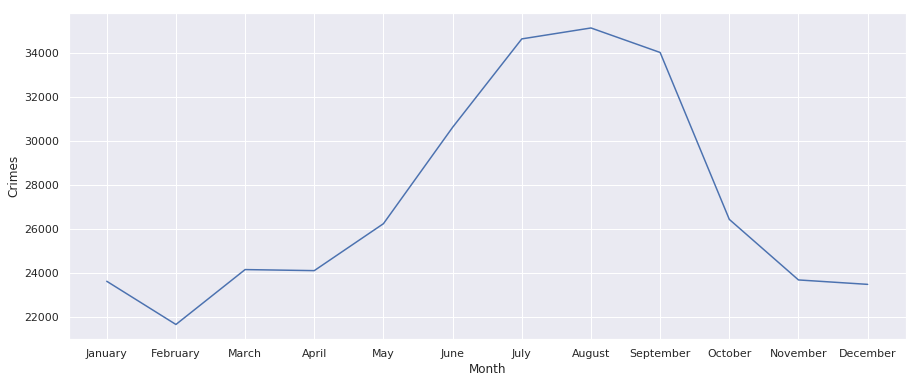

In [5]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))

sns.lineplot(x="Month", y="Crimes",
             data=monthly_df, sort = False)

As we see above, during summer months (June to September) crime activity is rising

Lineplot of crime activity per day of week

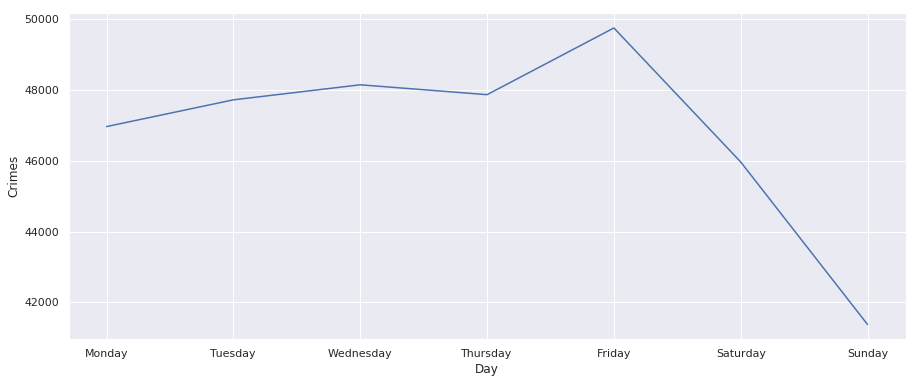

In [6]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))

sns.lineplot(x="Day", y="Crimes",
             data=daily_df, sort = False)

Suprisingly Saturday and Sunday are quiter in crime activity terms than the weekdays

Barplot crime activity per year

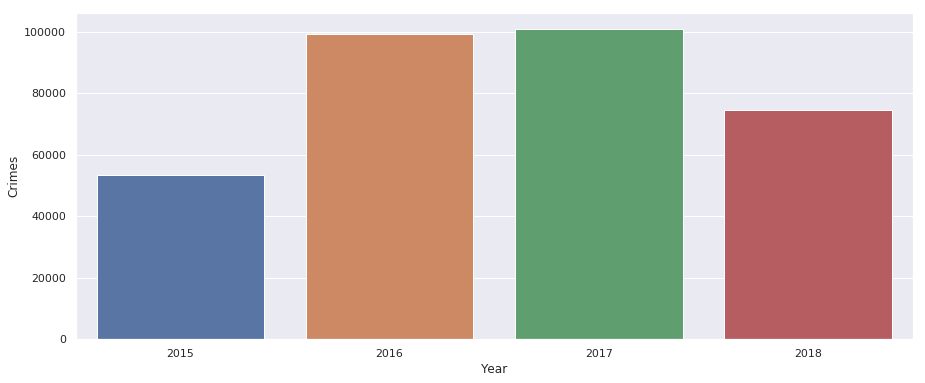

In [6]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))

sns.barplot(x="Year", y="Crimes",
             data=yearly_df)

Bar Plot of crimes in each district

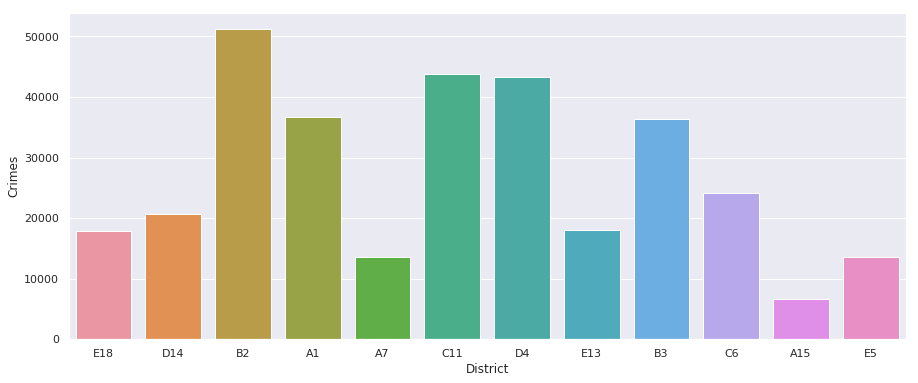

In [8]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))

sns.barplot(x="District", y="Crimes",
             data=district_df)

<h3>Question 2</h3><br>
Counting shootings per year and per district and store the information in dictionaries

In [19]:
#Question 2

shootings_year = {}
shootings_district = {}
count = 0

for shooting, year, district in zip(df['SHOOTING'], df['YEAR'], df['DISTRICT']):
    if shooting is "Y":
        if year in shootings_year:
            shootings_year[year] += 1
        else:
            shootings_year[year] = 1
        if district in shootings_district:
            shootings_district[district] += 1
        else:
            shootings_district[district] = 1

<b>Converting dictionaries to pandas dataframes</b> in order to be plotted with seaborn library

In [20]:
yearly_shootings_df = pd.DataFrame(list(shootings_year.items()), columns=['Year', 'Shootings'])

district_shootings_df = pd.DataFrame(list(shootings_district.items()), columns=['District', 'Shootings'])

Bar Plot shootings per year

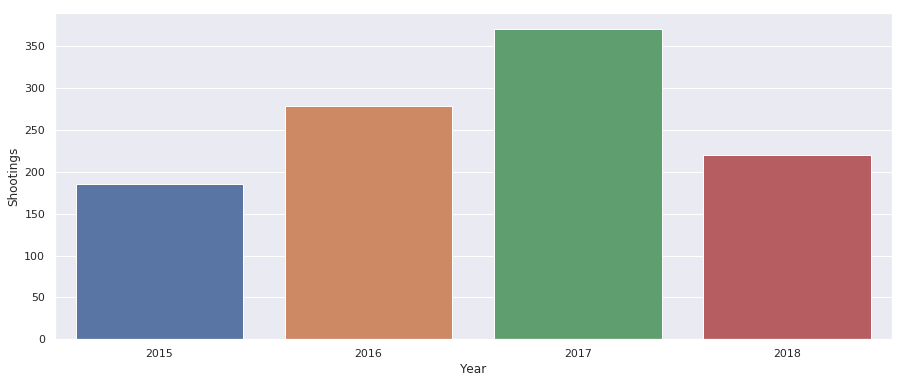

In [21]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))

sns.barplot(x="Year", y="Shootings",
             data=yearly_shootings_df)

Bar Plot shootings per distict

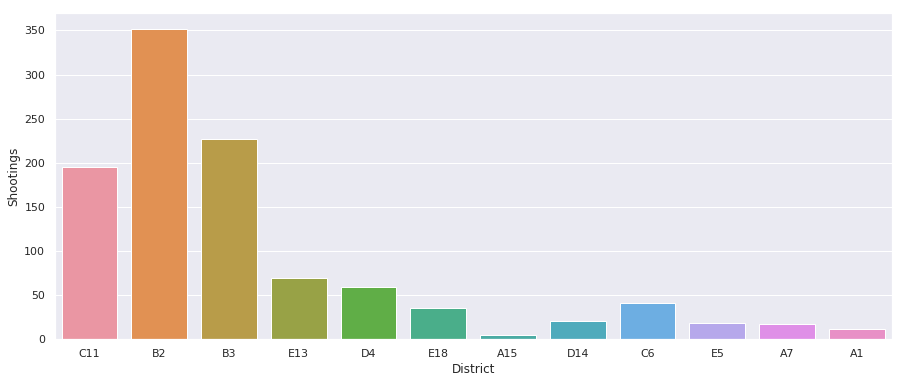

In [13]:
sns.set(style="darkgrid")

plt.figure(figsize=(15, 6))

sns.barplot(x="District", y="Shootings",
             data=district_shootings_df)

As it seems district B2, B3 and C11 are the most violent since there is an exponential bigger number of shootings than the other districts.

<h3>Question 3</h3><br>
Adding an extra column on the dataframe and adding the day or night information

In [65]:
#Question 3

dayornight = []
day_crimes = 0
night_crimes = 0
for hour in df['HOUR']:
    if (hour >= 18 or hour <= 6):
        dayornight.append("Night")
        night_crimes += 1
    else:
        dayornight.append("Day")
        day_crimes += 1
df["Day or Night"] = dayornight

print("Crimes commited during:\nDay time: ", day_crimes,"\nNight time ", night_crimes)

Crimes commited during:
Day time:  184268 
Night time  143552


<b>Observation:</b> Crimes commited during day time are higher than those commited during night time<br>
So, we were very curious and went on and plotted for every day the "day or night" information

<b>Creating Dataset to plot crime activity between day and night on a scale from Monday to Sunday</b>

In [79]:
from pandas.api.types import CategoricalDtype

day_type = CategoricalDtype(categories=days, ordered=True)

day_or_night_df = df.groupby(['DAY_OF_WEEK', 'Day or Night']).size().reset_index(name='Crimes')

#Sorting Days from Monday to Sunday
sorterIndex = dict(zip(days,range(len(days))))
day_or_night_df['Day_id'] = day_or_night_df['DAY_OF_WEEK']
day_or_night_df['Day_id'] = day_or_night_df['Day_id'].map(sorterIndex)
day_or_night_df.sort_values('Day_id', inplace=True)

Bar Plot "day or night" information for every day of the week

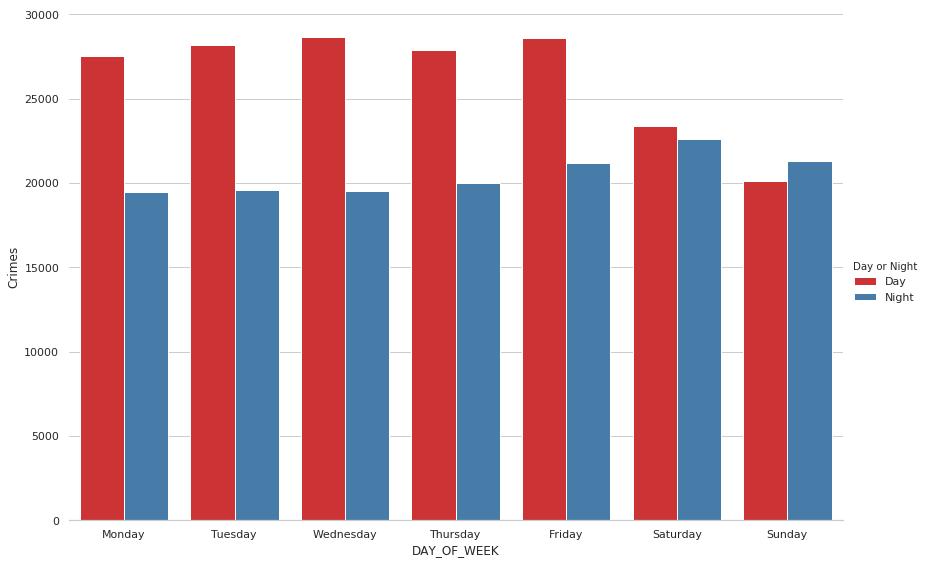

In [80]:
sns.set(style="whitegrid")

g = sns.catplot(x="DAY_OF_WEEK", y="Crimes", hue="Day or Night", data=day_or_night_df, 
                height=8, aspect=1.5, kind="bar", palette="Set1")
g.despine(left=True)
g.set_ylabels("Crimes")

<b>Observation: </b> As we see, the crimes on week days are much higher than crimes on week nights, but as we getting closer to weekends, the night crimes are rising.<br>

<h3>Question 4</h3><br>
Computing crime per offense code group

In [85]:
#Question 4

offense_codes = {}
for code, dayornight in zip(df['OFFENSE_CODE_GROUP'], df['Day or Night']):
    if dayornight is "Day":
        if code in offense_codes:
            offense_codes[code] += 1
        else:
            offense_codes[code] = 1
        
offense_codes_df = pd.DataFrame(list(offense_codes.items()), columns=['OFFENSE_CODE_GROUP', 'Count'])

Bar Plot the number of crimes for every offense code group

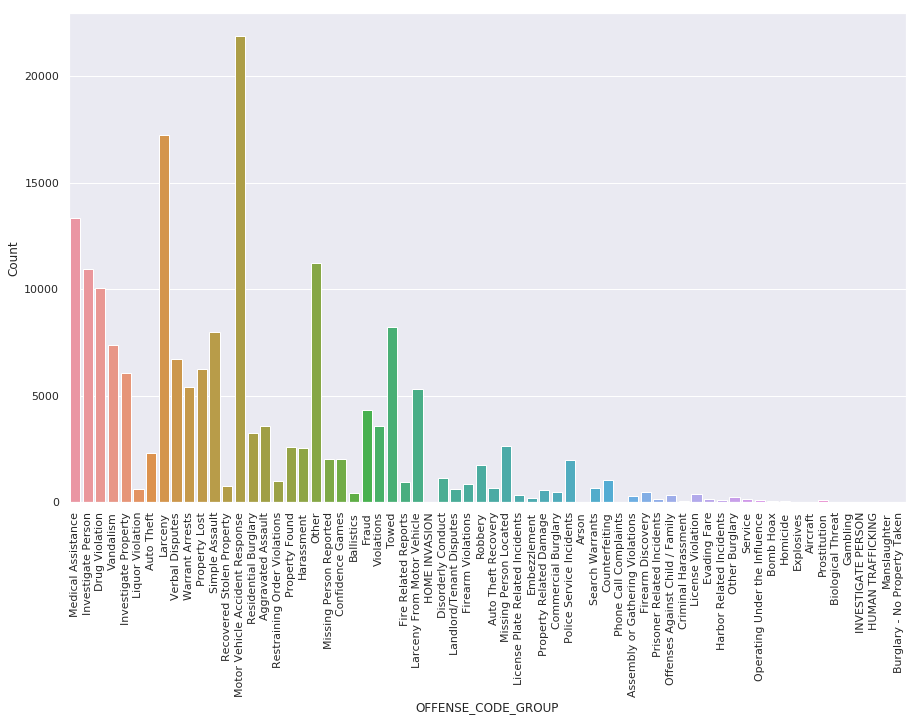

In [100]:
sns.set(style="darkgrid")
plt.figure(figsize=(15, 9))

plt.xticks(rotation='vertical')
sns.barplot(x="OFFENSE_CODE_GROUP", y="Count", orient='v',
            data=offense_codes_df)

<b>Observation:</b> The most frequent offense code is "Motor vehicle Accident Response" by far. Also "Larceny" and "Medical Assistance" are quite higher than the others.

<h3>Question 5</h3><br>
Using K-Means with default clusters 2 and by location.<br>
You can change the commented lines if you wish to add Offense code or month in Kmeans<br>
Or you can change the number of clusters<br>

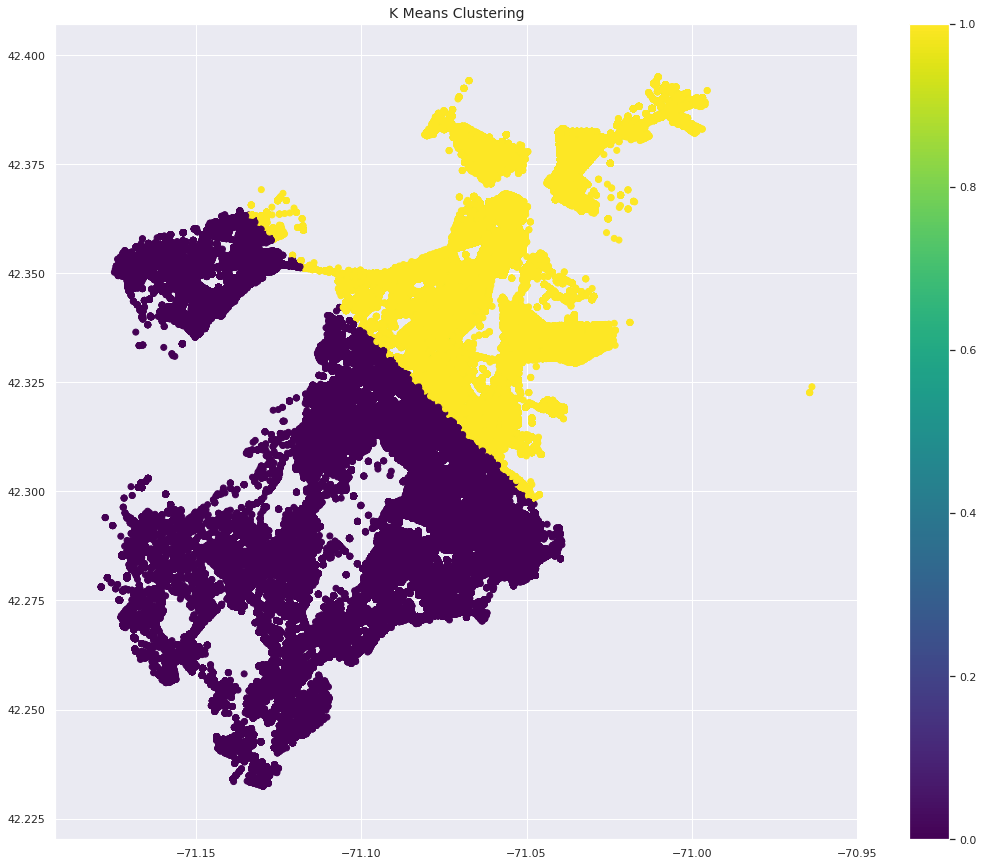

In [17]:
#Question 5
X = df[['Lat', 'Long']]
X = X.dropna()
X = X.loc[(X['Lat']>40) & (X['Long']<-60)]

#Uncomment the line below if you want to add OFFENSE_CODE in KMeans
#X["OFFENSE_CODE"] = df['OFFENSE_CODE']

#Uncomment the line below if you want to add MONTH in KMeans
# X["MONTH"] = df['MONTH']

#KMeans                    
km = KMeans(n_clusters=2)            #number of clusters can be changed at will 
km.fit(X)
km.predict(X)
labels = km.labels_
km.cluster_centers_

#Plotting
plt.figure(figsize=(18,15))
plt.title('K Means Clustering', fontsize=14)
plt.scatter(X['Long'], X['Lat'], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

<h3>Bonus question:</h3>

We used a sample of 5.000 drug violation crimes. <br>
Used dropna function to get rid of NaN data.<br>
And also on the 4th line there is a restriction between 40 and -60 and that is to get rid of some data that wasn't in boston and were random.<br>

In [83]:
#Bonus
X = df.loc[df['OFFENSE_CODE_GROUP'] == 'Drug Violation']
X = X[['Lat', 'Long']]
X = X.dropna()
X = X.loc[(X['Lat']>40) & (X['Long']<-60)]

sample = X.sample(n=5000)

#grab a random sample from df

interactive_map = folium.Map(location=[sample['Lat'].mean(), sample['Long'].mean()], zoom_start=11)

mc = MarkerCluster()

#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in sample.itertuples():
    mc.add_child(folium.Marker(location=[row.Lat,row.Long]))
interactive_map.add_child(mc)
interactive_map